# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.38'

### Load in the data

In [2]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.469129,1048.898738,0.897797
1,FI2,0.422026,1015.924767,0.831850
2,FI4,0.492548,1041.589916,0.883180
3,FI5,0.480006,1034.935183,0.869870
4,FI7,0.473515,1034.820102,0.869640


In [3]:
np.shape(df['T_C'])[0]

38

In [4]:
np.shape(df['T_C'].values)[0]

38

## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

In [5]:
MC_Av_Tonly, MC_All_Tonly=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000)
MC_Av_Tonly.head()

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.469129,6.595194,1.746869,1.746512,1.745810,0.074160,6.593846,6.591195,0.279988,50,0,0.0
1,FI2,0.422026,5.462309,1.446802,1.443781,1.445011,0.065203,5.450906,5.455550,0.246172,50,0,0.0
2,FI4,0.492548,7.071089,1.872919,1.869251,1.871828,0.084206,7.057239,7.066967,0.317915,50,0,0.0
3,FI5,0.480006,6.750062,1.787889,1.788530,1.789807,0.078594,6.752483,6.757304,0.296727,50,0,0.0
4,FI7,0.473515,6.607889,1.750232,1.750117,1.748658,0.078624,6.607456,6.601949,0.296840,50,0,0.0


### Lets plot the distribution for a single sample

In [6]:
FI2_input=df.loc[df['Sample']=="FI2"]

In [7]:
FI2_df_Tonly=MC_All_Tonly.loc[MC_All_Tonly['Filename']=='FI2']

Std dev of simulation Temp
49.80792688097334
Std dev of Calculated P
0.0652034511915314


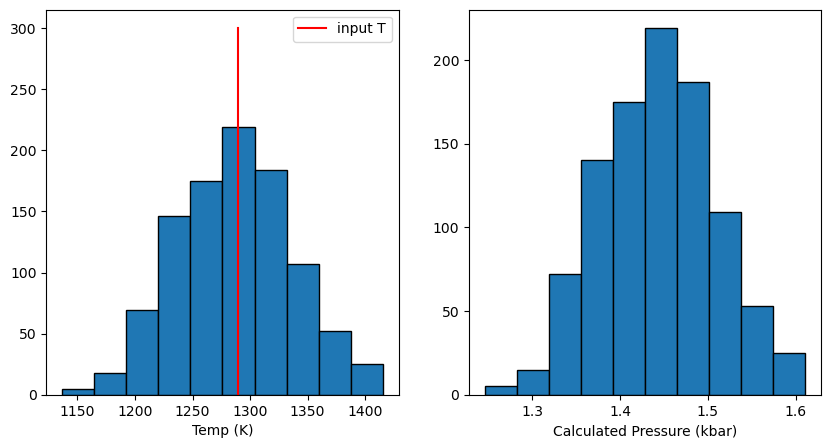

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([FI2_input['T_C']+273.15, FI2_input['T_C']+273.15], [0, 300], '-r', label='input T')
ax1.hist(FI2_df_Tonly['input_T_K'], ec='k')
print('Std dev of simulation Temp')
print(np.nanstd(FI2_df_Tonly['input_T_K']))
ax1.set_xlabel('Temp (K)')
ax1.legend()

ax2.hist(FI2_df_Tonly['Pressure (kbar)'], ec='k');
ax2.set_xlabel('Calculated Pressure (kbar)')
print('Std dev of Calculated P')
print(np.nanstd(FI2_df_Tonly['Pressure (kbar)']))

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

In [9]:
MC_Av_Tonly.columns

Index(['Filename', 'CO2_density_gcm3', 'SingleFI_D_km', 'SingleFI_P_kbar',
       'Mean_MC_P_kbar', 'Med_MC_P_kbar', 'std_dev_MC_P_kbar', 'Mean_MC_D_km',
       'Med_MC_D_km', 'std_dev_MC_D_km', 'error_T_K', 'error_CO2_dens_gcm3',
       'error_crust_dens_kgm3'],
      dtype='object')

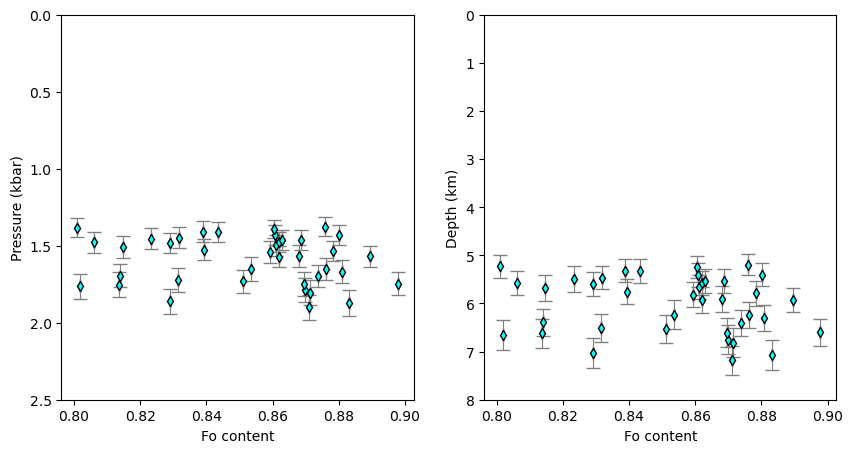

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

In [11]:
MC_Av_rhoonly, MC_All_rhoonly=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000)
MC_Av_rhoonly.head()

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.469129,6.595194,1.746869,1.757102,1.743555,0.263821,6.633828,6.582682,0.996038,0,10,0.0
1,FI2,0.422026,5.462309,1.446802,1.449840,1.436610,0.218223,5.473781,5.423830,0.823888,0,10,0.0
2,FI4,0.492548,7.071089,1.872919,1.879410,1.864517,0.299319,7.095595,7.039367,1.130059,0,10,0.0
3,FI5,0.480006,6.750062,1.787889,1.792486,1.790152,0.273849,6.767419,6.758607,1.033898,0,10,0.0
4,FI7,0.473515,6.607889,1.750232,1.756920,1.747443,0.280988,6.633141,6.597363,1.060854,0,10,0.0


In [12]:
FI2_df_rhoonly_All=MC_All_rhoonly.loc[MC_All_rhoonly['Filename']=='FI2']
FI2_df_rhoonly_Av=MC_Av_rhoonly.loc[MC_Av_rhoonly['Filename']=='FI2']

% error CO$_2$ density
0.1023569342007443
Std dev of Calculated P
0.2182232817645497


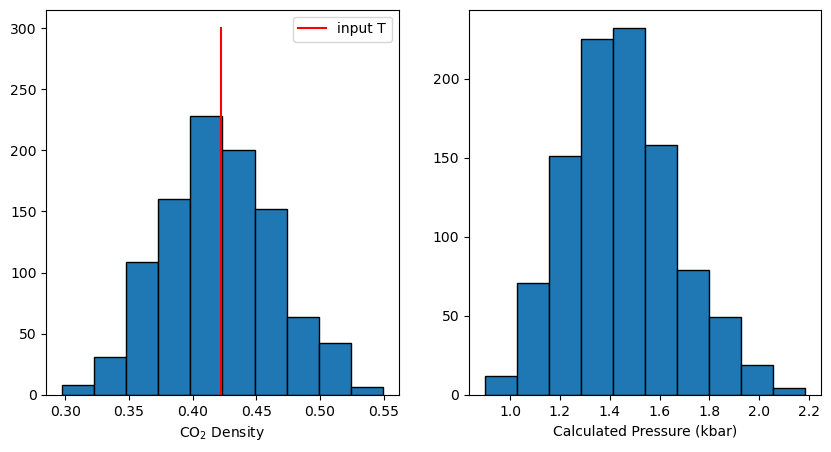

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([FI2_input['Density_g_cm3'], 
          FI2_input['Density_g_cm3']], [0, 300], '-r', label='input T')
ax1.hist(FI2_df_rhoonly_All['input_CO2_dens_gcm3'], ec='k')
print('% error CO$_2$ density')
print(np.nanstd(FI2_df_rhoonly_All['input_CO2_dens_gcm3'])/
     np.nanmean(FI2_df_rhoonly_All['input_CO2_dens_gcm3'])
     )
ax1.set_xlabel('CO$_2$ Density')
ax1.legend()

ax2.hist(FI2_df_rhoonly_All['Pressure (kbar)'], ec='k');
ax2.set_xlabel('Calculated Pressure (kbar)')
print('Std dev of Calculated P')
print(np.nanstd(FI2_df_rhoonly_All['Pressure (kbar)']))

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

In [14]:
MC_Av_rho_T, MC_All_rho_T=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_density_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000)
MC_Av_rho_T.head()

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.469129,6.595194,1.746869,1.748507,1.744219,0.125606,6.601379,6.585190,0.474217,30,0.02,0.0
1,FI2,0.422026,5.462309,1.446802,1.447913,1.444794,0.107463,5.466506,5.454729,0.405721,30,0.02,0.0
2,FI4,0.492548,7.071089,1.872919,1.866798,1.863754,0.128664,7.047979,7.036487,0.485762,30,0.02,0.0
3,FI5,0.480006,6.750062,1.787889,1.792917,1.795884,0.129860,6.769045,6.780246,0.490278,30,0.02,0.0
4,FI7,0.473515,6.607889,1.750232,1.750428,1.750971,0.124763,6.608631,6.610683,0.471036,30,0.02,0.0


## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

In [15]:
2700*5/100

135.0

In [16]:
MC_Av_rho_T_CD, MC_All_rho_T_CD=pf.loop_all_FI_MC(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_density_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000)
MC_Av_rho_T_CD.head()

working on sample number 0
working on sample number 20


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,FI1,0.469129,6.595194,1.746869,1.749498,1.743063,0.128370,6.631994,6.589609,0.580761,30,0.02,135.0
1,FI2,0.422026,5.462309,1.446802,1.448033,1.444327,0.106412,5.474592,5.466524,0.482107,30,0.02,135.0
2,FI4,0.492548,7.071089,1.872919,1.886787,1.887132,0.131487,7.147925,7.106300,0.605486,30,0.02,135.0
3,FI5,0.480006,6.750062,1.787889,1.783231,1.776332,0.124285,6.746225,6.717550,0.566346,30,0.02,135.0
4,FI7,0.473515,6.607889,1.750232,1.752616,1.749309,0.120689,6.626764,6.604596,0.567620,30,0.02,135.0


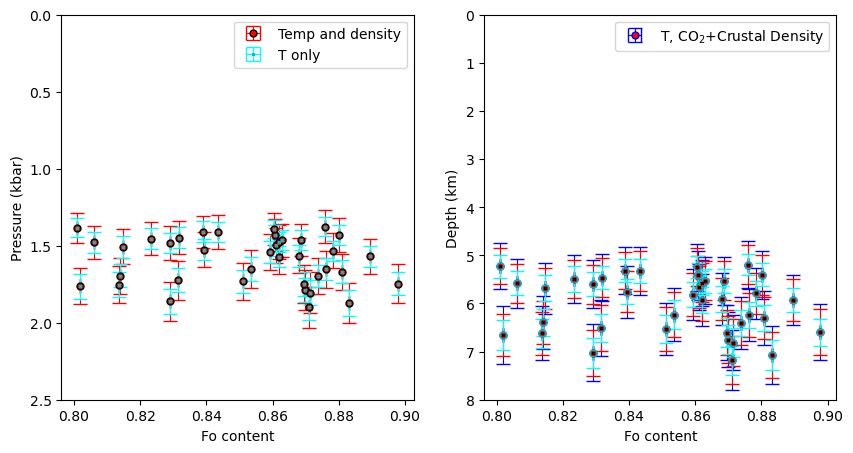

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='red', ms=5, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()